In [2]:
import pandas as pd
df = pd.read_excel('/content/online_retail_II.xlsx')

문제 1: 데이터 로드 및 탐색

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


문제 2: 데이터 전처리

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df = df.dropna(subset=['Customer ID'])

In [7]:
df['Customer ID'] = pd.to_numeric(df['Customer ID'], errors = 'coerce')

<ipython-input-7-10b5ff546a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = pd.to_numeric(df['Customer ID'], errors = 'coerce')


In [8]:
df['Customer ID'] = df['Customer ID'].astype('Int64')

In [9]:
df = df.sort_values(by=['InvoiceDate'])

In [10]:
df['Total'] = df['Quantity']*df['Price']

문제 3: 나라별 구매 인원 시각화

<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-13c91ced8e4f>:22: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

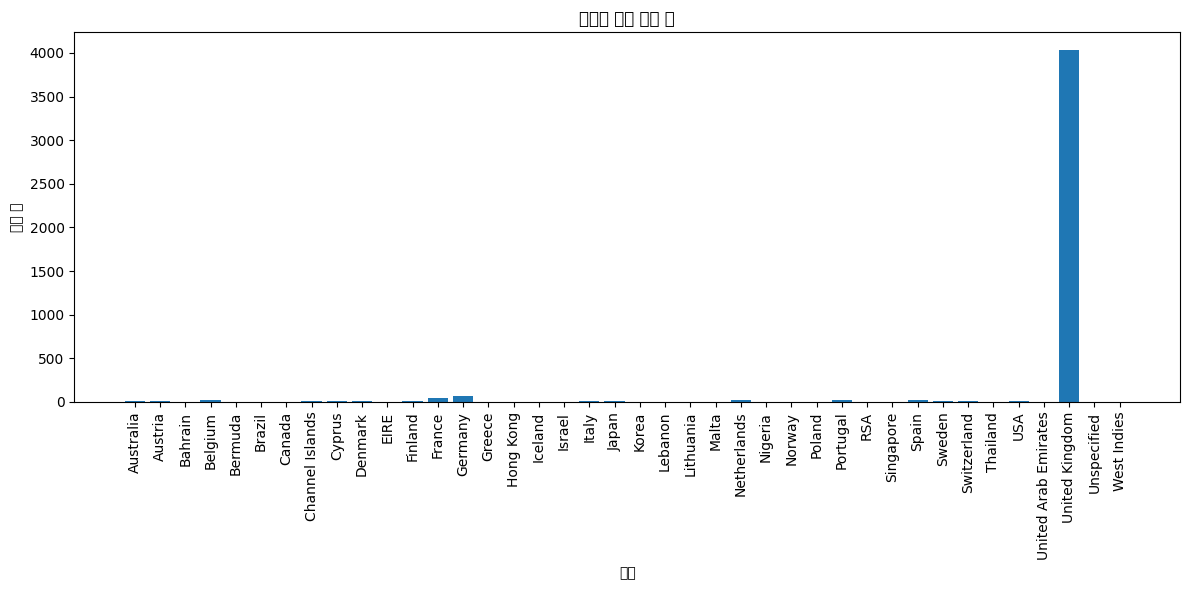

In [4]:
# '나라'별 고객 수 계산
country_customer_counts = df.groupby('Country')['Customer ID'].nunique().reset_index()

import pandas as pd
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 막대 그래프 생성
plt.bar(country_customer_counts['Country'], country_customer_counts['Customer ID'])

# 그래프 제목, 축 레이블 설정
plt.title('나라별 구매 고객 수')
plt.xlabel('나라')
plt.ylabel('고객 수')

# x축 눈금 레이블 회전
plt.xticks(rotation=90)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

문제 4: Acquisition (고객 유입 분석)

In [6]:
# first_purchase_date 변수 정의
first_purchase_date = df.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase_date.rename(columns={'InvoiceDate': 'FirstPurchaseDate'}, inplace=True)

# 고객의 첫 구매 시점을 기준으로 월별 신규 유입 고객 수 계산
first_purchase_date['FirstPurchaseMonth'] = first_purchase_date['FirstPurchaseDate'].dt.to_period('M')
monthly_new_customers = first_purchase_date.groupby('FirstPurchaseMonth')['Customer ID'].nunique().reset_index()
monthly_new_customers.rename(columns={'Customer ID': 'NewCustomers'}, inplace=True)

# 결과 출력
print(monthly_new_customers)

   FirstPurchaseMonth  NewCustomers
0             2009-12          1045
1             2010-01           394
2             2010-02           363
3             2010-03           436
4             2010-04           291
5             2010-05           254
6             2010-06           269
7             2010-07           183
8             2010-08           158
9             2010-09           242
10            2010-10           379
11            2010-11           322
12            2010-12            47


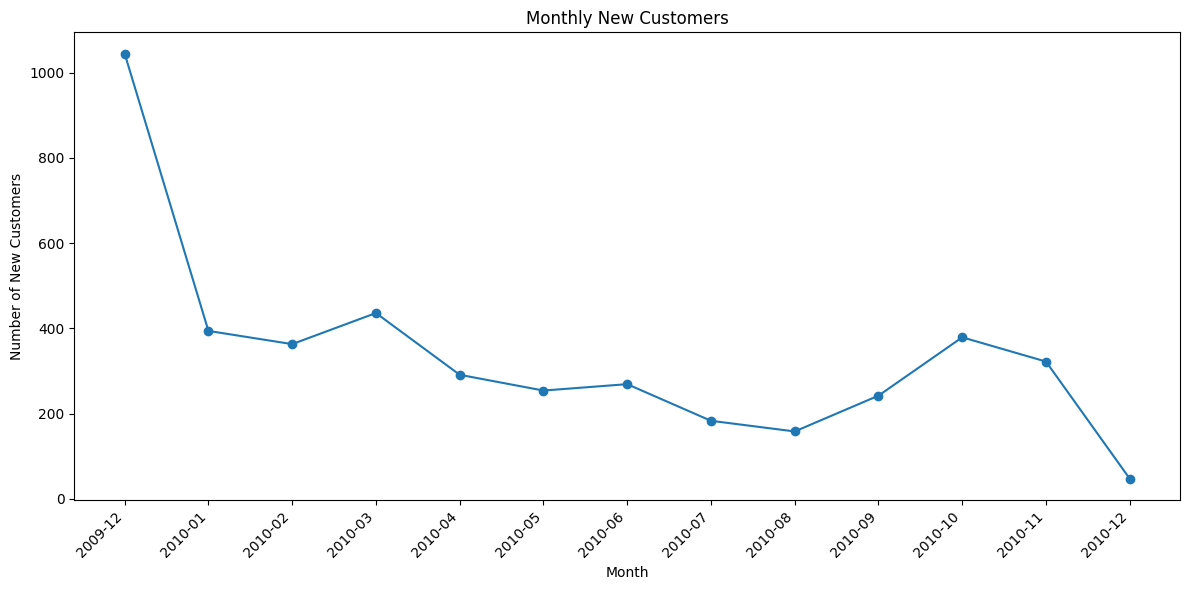

In [7]:
# 고객의 첫 구매 날짜 추출
first_purchase_date = df.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase_date.rename(columns={'InvoiceDate': 'FirstPurchaseDate'}, inplace=True)

# 월별 신규 고객 수 계산
first_purchase_date['FirstPurchaseMonth'] = first_purchase_date['FirstPurchaseDate'].dt.to_period('M')
monthly_new_customers = first_purchase_date.groupby('FirstPurchaseMonth')['Customer ID'].nunique().reset_index()
monthly_new_customers.rename(columns={'Customer ID': 'NewCustomers'}, inplace=True)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_new_customers['FirstPurchaseMonth'].astype(str), monthly_new_customers['NewCustomers'], marker='o')
plt.title('Monthly New Customers')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

문제 5 : Activation (고객 활성화 분석)

In [9]:
# 'Total' 열 생성
df['Total'] = df['Quantity'] * df['Price']

# 고객별 총 구매 금액 계산
customer_total_purchase = df.groupby('Customer ID')['Total'].sum().reset_index()

# 활성화된 고객 정의 (총 구매 금액 £50 이상)
activated_customers = customer_total_purchase[customer_total_purchase['Total'] >= 50]

# 활성화된 고객 ID 추출
activated_customer_ids = activated_customers['Customer ID'].tolist()

# 활성화된 고객 데이터 필터링
activated_customers_df = df[df['Customer ID'].isin(activated_customer_ids)]

# 결과 출력
print(f"활성화된 고객 수: {len(activated_customer_ids)}")


활성화된 고객 수: 4218


In [10]:
# 전체 고객 수
total_customers = df['Customer ID'].nunique()

# 활성화된 고객 수
activated_customers = customer_total_purchase[customer_total_purchase['Total'] >= 50]
num_activated_customers = activated_customers['Customer ID'].nunique()

# 활성화율 계산
activation_rate = (num_activated_customers / total_customers) * 100

# 결과 출력
print(f"전체 고객 수: {total_customers}")
print(f"활성화된 고객 수: {num_activated_customers}")
print(f"활성화율: {activation_rate:.2f}%")

전체 고객 수: 4383
활성화된 고객 수: 4218
활성화율: 96.24%


문제 6: Retention: 코호트 분석(고객)

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

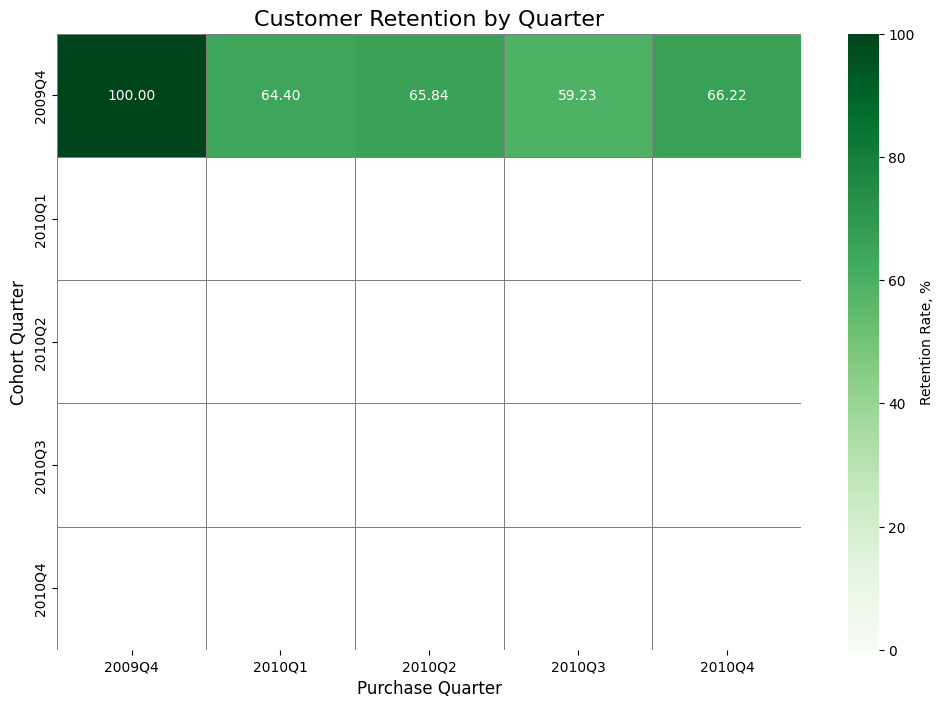

In [37]:
# 고객별 첫 구매 월 추출
df['FirstPurchaseMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

# 고객별 구매 월 추출
df['PurchaseMonth'] = df['InvoiceDate'].dt.to_period('Q')

# 코호트 테이블 생성
cohort_data = df.groupby(['FirstPurchaseMonth', 'PurchaseMonth'])['Customer ID'].nunique().reset_index()
cohort_data = cohort_data.pivot(index='FirstPurchaseMonth', columns='PurchaseMonth', values='Customer ID')

# 첫 번째 열을 기준으로 유지율 계산
retention = cohort_data.divide(cohort_data.iloc[:, 0], axis=0) * 100

# 히트맵 생성
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=retention,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0,
    vmax=100
)
heatmap.set_title('Customer Retention by Quarter', fontsize=16)
heatmap.set_xlabel('Purchase Quarter', fontsize=12)
heatmap.set_ylabel('Cohort Quarter', fontsize=12)
plt.show()

문제 7: Retention: 코호트 분석(평균 구매수량)

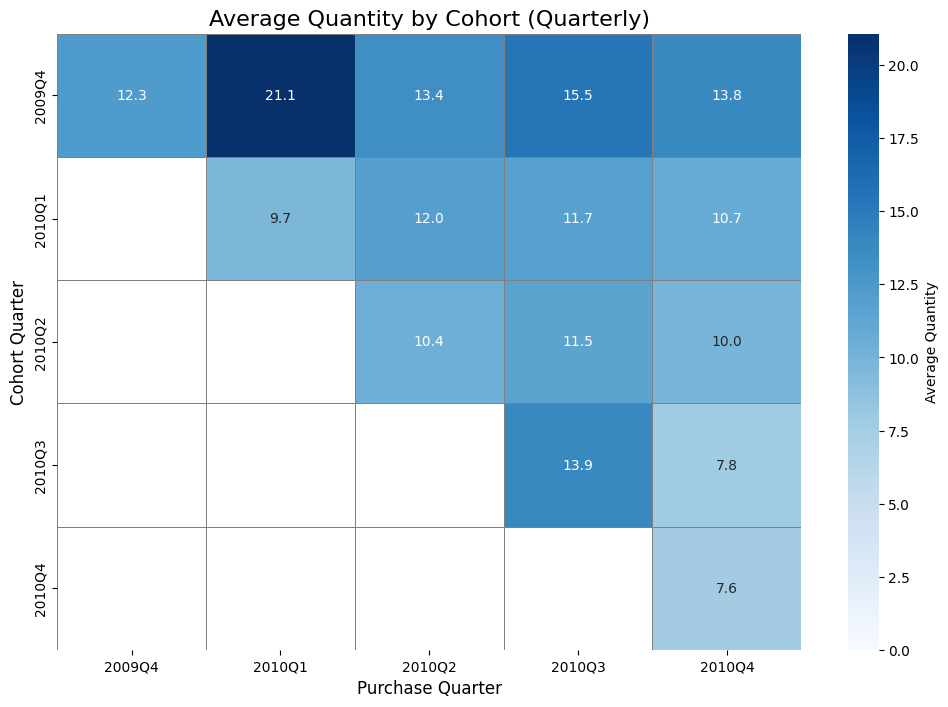

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 고객별 첫 구매 월 추출 (분기)
df['FirstPurchaseMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')

# 고객별 구매 월 추출 (분기)
df['PurchaseMonth'] = df['InvoiceDate'].dt.to_period('Q')

# 코호트 테이블 생성 (평균 구매 수량)
cohort_data = df.groupby(['FirstPurchaseMonth', 'PurchaseMonth'])['Quantity'].mean().reset_index()
average_quantity = cohort_data.pivot_table(index='FirstPurchaseMonth', columns='PurchaseMonth', values='Quantity')


# 히트맵 생성
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
heatmap.set_title('Average Quantity by Cohort (Quarterly)', fontsize=16)
heatmap.set_xlabel('Purchase Quarter', fontsize=12)
heatmap.set_ylabel('Cohort Quarter', fontsize=12)
plt.show()

문제 8: Revenue : ARPU

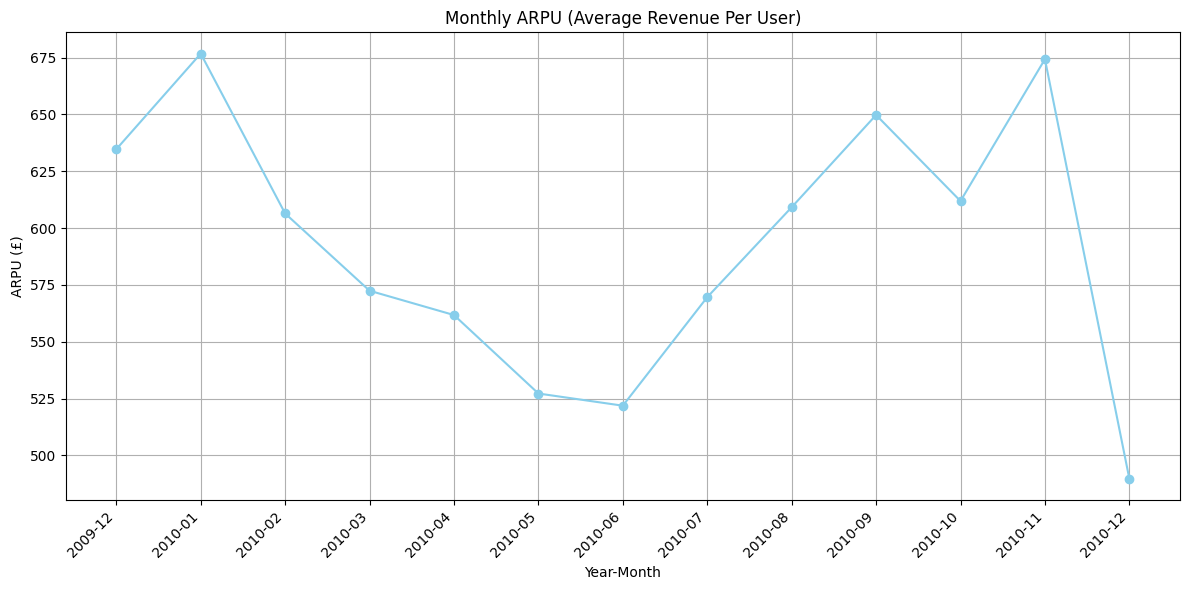

In [40]:
# 'Total' 열 생성 (이전 코드에서 계산된 'Total' 열이 없을 경우)
df['Total'] = df['Quantity'] * df['Price']

# 월별 고객별 총 구매 금액 계산
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby(['YearMonth', 'Customer ID'])['Total'].sum().reset_index()

# 월별 ARPU 계산
arpu = monthly_revenue.groupby('YearMonth')['Total'].mean().reset_index()
arpu.rename(columns={'Total': 'ARPU'}, inplace=True)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(arpu['YearMonth'].astype(str), arpu['ARPU'], marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

문제 9: Revenue(CLV)

In [46]:
# 'Total' 열 생성 (이전 코드에서 계산된 'Total' 열이 없을 경우)
df['Total'] = df['Quantity'] * df['Price']

# 고객별 평균 구매 금액 계산
customer_avg_purchase = df.groupby('Customer ID')['Total'].mean().reset_index()
customer_avg_purchase.rename(columns={'Total': 'AvgPurchase'}, inplace=True)

# 고객별 평균 구매 빈도 계산
customer_purchase_frequency = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Invoice': 'PurchaseFrequency'}, inplace=True)

# 고객 유지 기간 계산
customer_lifespan = df.groupby('Customer ID')['InvoiceDate'].agg(['min', 'max']).reset_index()
customer_lifespan['Lifespan'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days + 1

# 데이터 병합
clv_data = pd.merge(customer_avg_purchase, customer_purchase_frequency, on='Customer ID')
clv_data = pd.merge(clv_data, customer_lifespan[['Customer ID', 'Lifespan']], on='Customer ID')

# CLV 계산
clv_data['CLV'] = clv_data['AvgPurchase'] * clv_data['PurchaseFrequency'] * clv_data['Lifespan']

# CLV 기준 내림차순 정렬
clv_data = clv_data.sort_values(by=['CLV'], ascending=False)


print(clv_data[['Customer ID', 'CLV']])

      Customer ID           CLV
4254      18102.0  1.912335e+07
4135      17949.0  1.416688e+07
2533      15838.0  6.054286e+06
2687      16029.0  5.232407e+06
957       13694.0  5.007023e+06
...           ...           ...
1782      14802.0 -1.803576e+04
3725      17399.0 -2.511109e+04
1019      13776.0 -8.674335e+04
2236      15413.0 -2.027917e+05
1225      14063.0 -3.350239e+05

[4383 rows x 2 columns]


**기초통계 문제**

문제 10

In [24]:
import numpy as np

# 고객 수
num_customers = 100

# 대기시간 범위 (분)
min_waiting_time = 5
max_waiting_time = 15

# 균등분포를 따르는 대기시간 생성
waiting_times = np.random.uniform(min_waiting_time, max_waiting_time, num_customers)

# 평균 대기시간 계산
mean_waiting_time = np.mean(waiting_times)

# 표준편차 계산
std_waiting_time = np.std(waiting_times)

# 결과 출력
print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 10.32
표준편차: 2.91


문제 11

In [25]:
# 성공 확률
success_probability = 0.3

# 시뮬레이션 횟수
num_simulations = 10

# 시뮬레이션 결과 (성공: 1, 실패: 0)
outcomes = np.random.binomial(1, success_probability, size=num_simulations)

# 성공 횟수 계산
success_count = np.sum(outcomes)

# 결과 출력
print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [1 0 1 0 0 0 1 1 0 1]
성공 횟수: 5


문제 12

In [26]:
# 학생 수
num_students = 20

# 문제 수
num_questions = 5

# 정답 확률
correct_probability = 0.7

# 학생별 점수 시뮬레이션
scores = []
for _ in range(num_students):
    # 각 학생이 각 문제를 맞힐 확률을 시뮬레이션
    correct_answers = np.random.binomial(1, correct_probability, size=num_questions)
    # 맞힌 문제 수를 점수로 변환
    score = np.sum(correct_answers)
    scores.append(score)

# 평균 점수 계산
average_score = np.mean(scores)

# 결과 출력
print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(5), np.int64(5), np.int64(4), np.int64(4), np.int64(3), np.int64(5)]
평균 점수: 3.95


문제 13

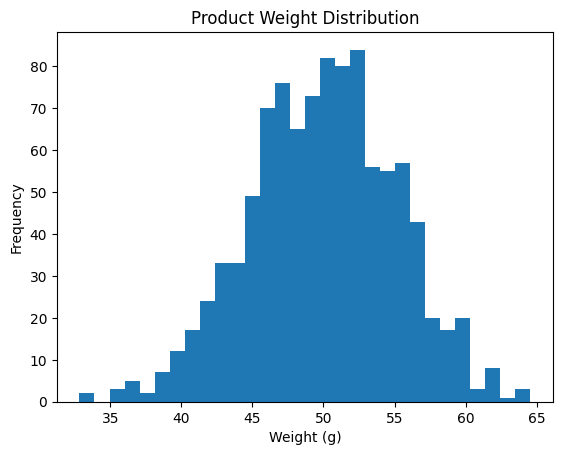

45g 이상 55g 이하 비율: 66.30%


In [27]:
# 제품 무게 시뮬레이션
num_products = 1000
mean_weight = 50
std_weight = 5
weights = np.random.normal(mean_weight, std_weight, num_products)

# 무게가 45g 이상 55g 이하인 제품 비율 계산
within_range = np.sum((weights >= 45) & (weights <= 55)) / num_products

# 히스토그램 생성
plt.hist(weights, bins=30)
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

# 결과 출력
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")